In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import cv2

AxesImage(shape=(1464, 1920, 3))


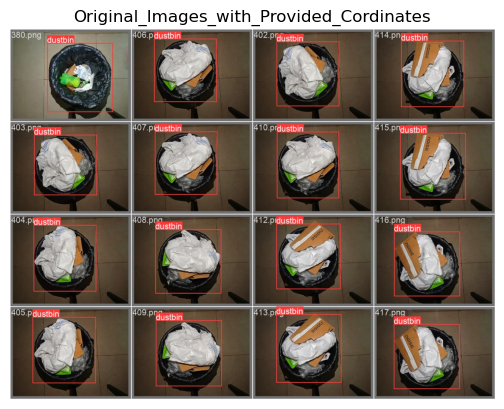

In [3]:
# Original Images with Provided Cordinates
validation_Images_1=cv2.imread(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\val_batch0_labels.jpg")
plt.title("Original_Images_with_Provided_Cordinates")
plt.axis('off')
print(plt.imshow(validation_Images_1[:,:,::-1]))

AxesImage(shape=(1464, 1920, 3))


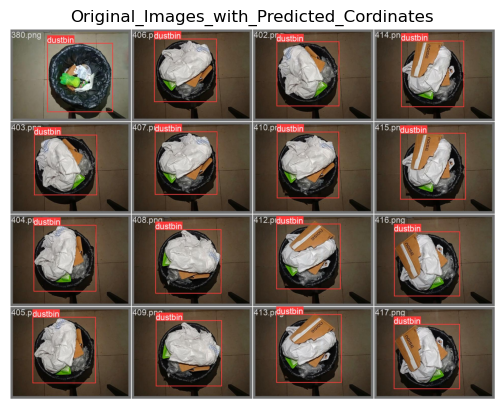

In [4]:
# Original Images with Predicted Cordinates
validation_Images_2=cv2.imread(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\val_batch0_pred.jpg")
plt.title("Original_Images_with_Predicted_Cordinates")
plt.axis('off')
print(plt.imshow(validation_Images_1[:,:,::-1]))

AxesImage(shape=(2250, 3000, 3))


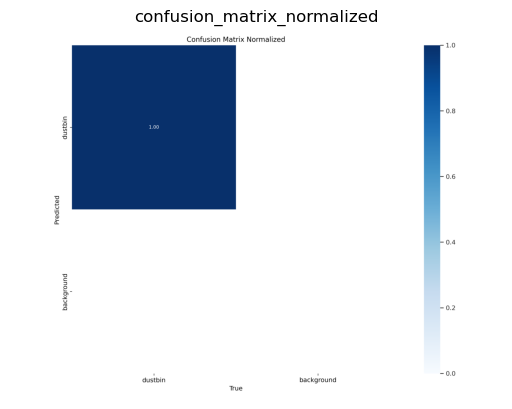

In [5]:
#Confusion Matrix
confusion_matrix_normalized=cv2.imread(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\confusion_matrix_normalized.png")
plt.title("confusion_matrix_normalized")
plt.axis('off')
print(plt.imshow(confusion_matrix_normalized[:,:,::-1]))

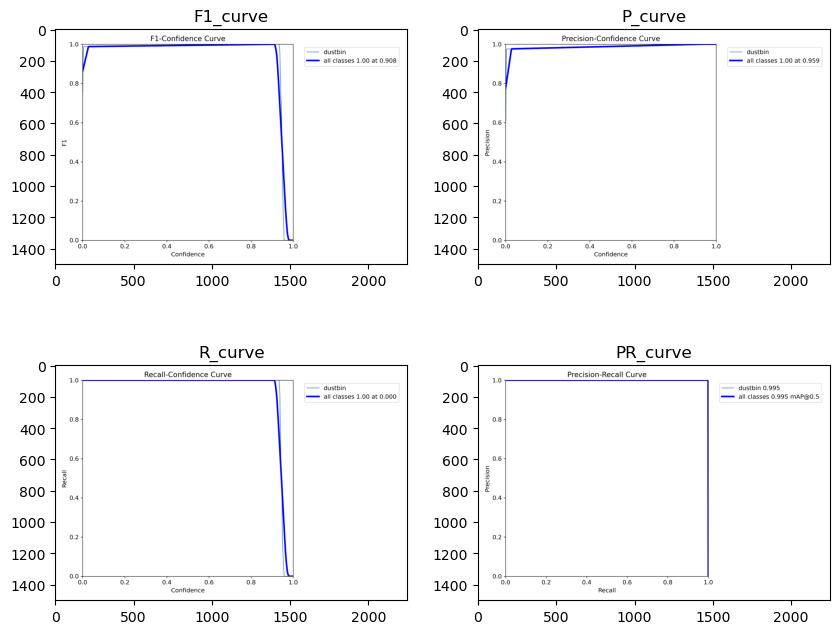

In [6]:
# Showing Results and Plots
fig=plt.figure(figsize=(10,8))
columns=2
rows=2
i=1
files = ['F1_curve.png','P_curve.png','R_curve.png','PR_curve.png']
for file in files:
    img=cv2.imread(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\"+file)
    fig.add_subplot(rows,columns,i).title.set_text(file[0:file.find(".")])
    i=i+1
    plt.imshow(img[:,:,::-1])

AxesImage(shape=(1200, 2400, 3))


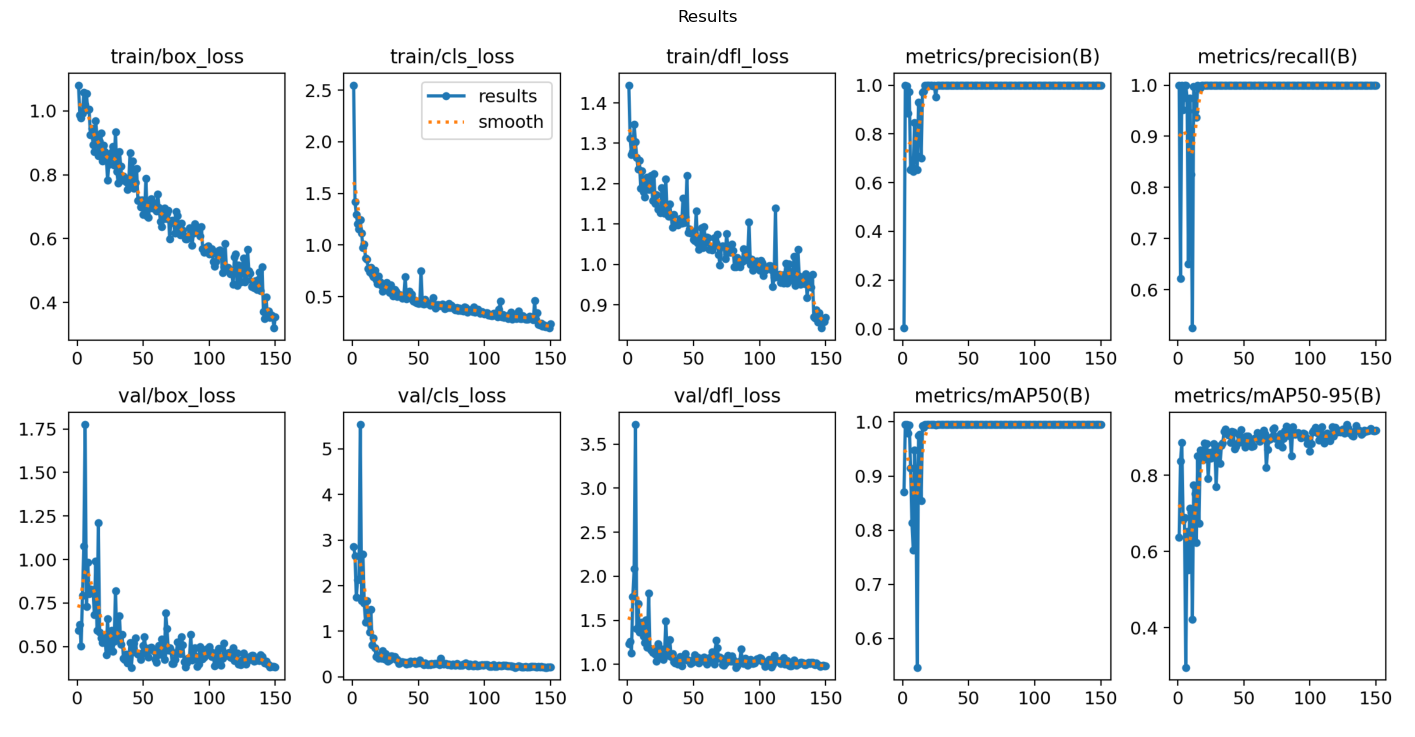

In [7]:
# Result
plt.rcParams["figure.figsize"] = (18, 10)
results=cv2.imread(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\results.png")
plt.title("Results")
plt.axis('off')
print(plt.imshow(results[:,:,::-1]))

In [8]:
model=YOLO(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\weights\\best.pt")


0: 480x640 1 dustbin, 190.9ms
Speed: 0.0ms preprocess, 190.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 110.2ms
Speed: 4.2ms preprocess, 110.2ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 138.3ms
Speed: 4.2ms preprocess, 138.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 134.4ms
Speed: 11.7ms preprocess, 134.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 142.6ms
Speed: 0.0ms preprocess, 142.6ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 122.6ms
Speed: 0.0ms preprocess, 122.6ms inference, 10.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 116.9ms
Speed: 0.0ms preprocess, 116.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 dustbins, 116.2ms
Speed: 10.5ms preprocess, 116.2ms inference, 0.0ms postp

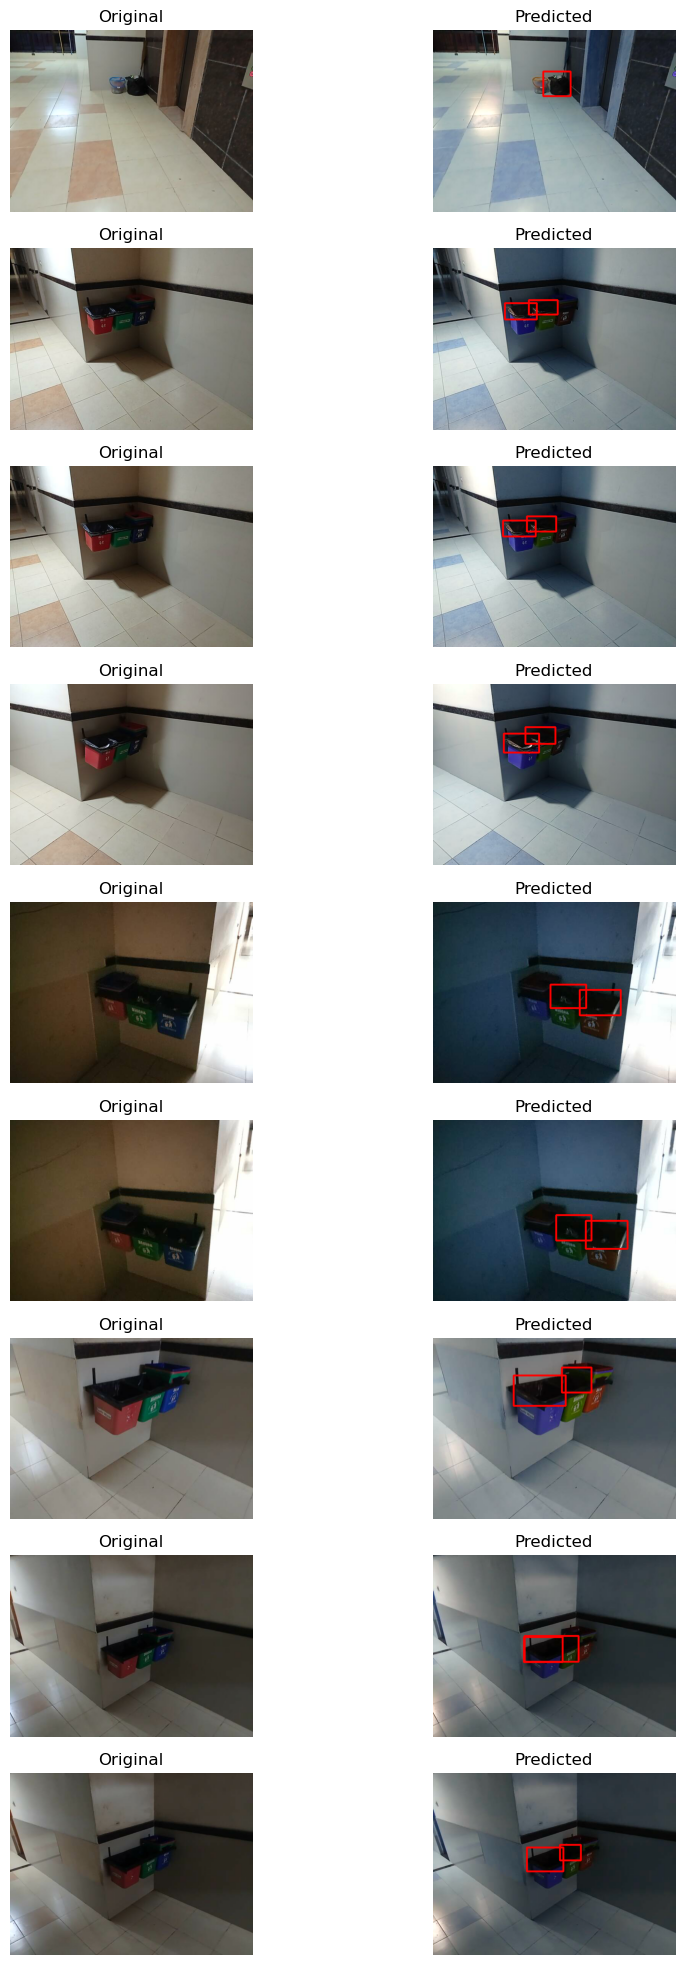

In [10]:
Test_dir=os.getcwd()+"\\Test_Dustbin_Detection"
fig=plt.figure(figsize=(10,25))
columns=2
rows=len(os.listdir(Test_dir))
i=1
for file in os.listdir(Test_dir):
    file_path=Test_dir+"\\"+file
    img=cv2.imread(file_path)
    fig.add_subplot(rows,columns,i).title.set_text("Original")
    i=i+1
    plt.axis('off')
    plt.imshow(img[:,:,::-1])

    
    cordinates=model.predict(img)[0].boxes.xyxy
    for (x1,y1,x2,y2) in cordinates:
        x1=int(x1)
        x2=int(x2)
        y1=int(y1)
        y2=int(y2)
        img = cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 3) 
    fig.add_subplot(rows,columns,i).title.set_text("Predicted")
    i=i+1
    plt.axis('off')
    
    plt.imshow(img)